<a href="https://colab.research.google.com/github/HLCarbon/DeepLearning/blob/main/TensorFlow_Derek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow import math
from keras. utils.vis_utils import plot_model
if(tf.config.list_physical_devices('GPU')):
  print('Yes')

### Download Data

In [ ]:
nba_data = pd.read_csv('https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv')
nba_data.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


### Delete Unknown Values

In [ ]:
nba_data.isna().sum()
nba_data = nba_data.dropna()

### Delete unnecessary data

In [ ]:
# We dont need the first and last names
nba_data_numeric = nba_data.copy()
nba_data_numeric.drop(['first_name','last_name'], axis = 1, inplace = True)
nba_data_numeric.head()

,team,salary,pos,age,g,gs,mp,fg,fga,fg%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,TOR,2711280.0,C,22,73,28,1725,265,603,0.439,...,0.595,146,327,473,82,37,41,84,151,664
1,MIA,28103550.0,C,24,56,56,1825,406,729,0.557,...,0.753,137,427,564,190,80,44,148,171,1068
2,BRK,2641691.0,C,36,47,12,1050,252,458,0.550,...,0.873,73,185,258,42,14,47,44,78,607
3,MIL,4054695.0,SG,26,66,61,1805,255,569,0.448,...,0.865,32,190,222,100,46,18,43,96,733
4,CLE,20000000.0,C,23,56,56,1809,369,545,0.677,...,0.708,192,410,602,92,44,75,94,97,904


### Convert to float

In [ ]:
# Create costum function that changes dollars/euros to floats
def clean_currency(x: pd.Series):
  if isinstance(x,str):
    return(x.replace('$','').replace('€', '').replace(',',''))
  return x

In [ ]:
nba_data_numeric['salary'] = clean_currency(nba_data_numeric['salary']).astype('float')
nba_data_numeric.head()

,team,salary,pos,age,g,gs,mp,fg,fga,fg%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,TOR,2711280.0,C,22,73,28,1725,265,603,0.439,...,0.595,146,327,473,82,37,41,84,151,664
1,MIA,28103550.0,C,24,56,56,1825,406,729,0.557,...,0.753,137,427,564,190,80,44,148,171,1068
2,BRK,2641691.0,C,36,47,12,1050,252,458,0.550,...,0.873,73,185,258,42,14,47,44,78,607
3,MIL,4054695.0,SG,26,66,61,1805,255,569,0.448,...,0.865,32,190,222,100,46,18,43,96,733
4,CLE,20000000.0,C,23,56,56,1809,369,545,0.677,...,0.708,192,410,602,92,44,75,94,97,904


In [ ]:
print('data, shape:', np.shape(nba_data_numeric))
print(nba_data_numeric.describe())

data, shape: (289, 29)
             salary         age           g          gs           mp  \
count  2.890000e+02  289.000000  289.000000  289.000000   289.000000   
mean   8.972877e+06   25.768166   56.619377   30.415225  1373.657439   
std    1.008679e+07    4.378557   18.081042   26.947104   698.833132   
min    5.318000e+03   19.000000    9.000000    0.000000    35.000000   
25%    2.033160e+06   22.000000   47.000000    5.000000   799.000000   
50%    4.259259e+06   25.000000   62.000000   21.000000  1406.000000   
75%    1.242000e+07   29.000000   70.000000   57.000000  1931.000000   
max    4.578097e+07   38.000000   82.000000   80.000000  2743.000000   

               fg          fga         fg%          3p         3pa  ...  \
count  289.000000   289.000000  289.000000  289.000000  289.000000  ...   
mean   237.546713   514.283737    0.458730   74.276817  208.335640  ...   
std    164.543135   347.674340    0.072096   63.139612  166.382283  ...   
min      3.000000    13.0000

### Box plot

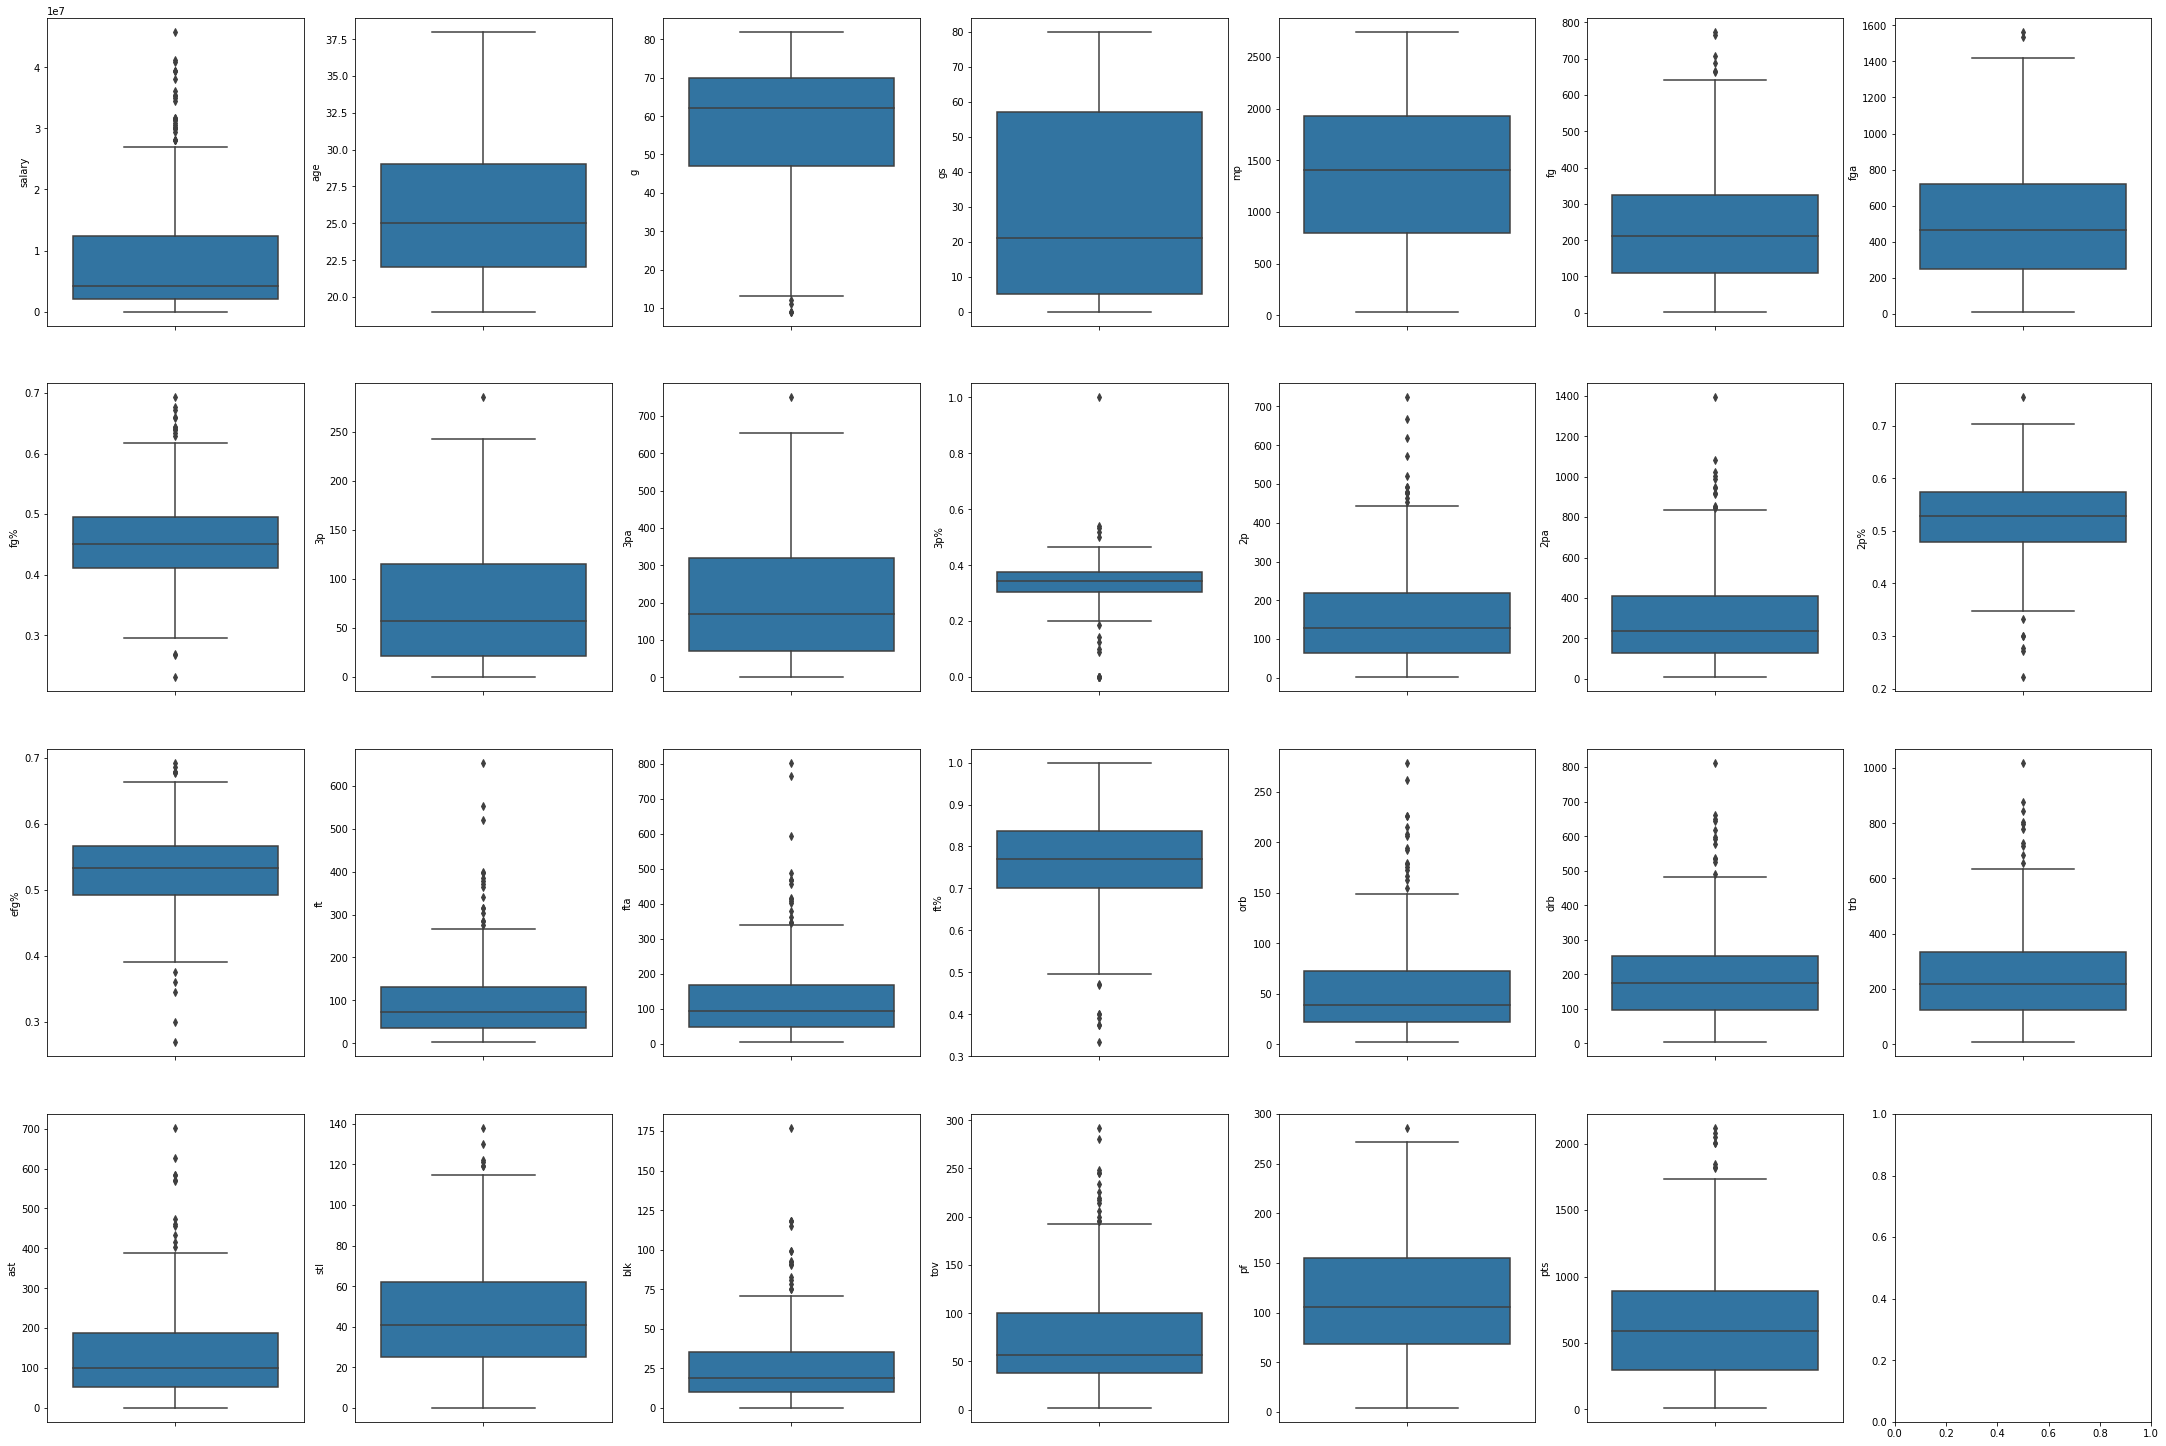

In [ ]:
# visually see that if we have a lot of outliers
fig, axs = plt.subplots(ncols = 7, nrows = 4, figsize = (30,20))
index = 0
axs = axs.flatten()
nba_data_actual_numeric = nba_data_numeric.copy()
nba_data_actual_numeric.drop(['team','pos'],axis = 1, inplace = True)
for k, v in nba_data_actual_numeric.items():
  #.items() returns basically a tupple containing the columns name as k and
  # the values of that column as v
  sns.boxplot(y = k, data = nba_data_actual_numeric,ax = axs[index])
  index +=1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad=5.0)
